<center><b>©Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/LR_Cost_function_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
      </table>

##Linear Regression Cost Function




 This notebook gives you a brief introduction to the Cost function of Linear Regression
<br>

Most of the notebooks we are going to be using are inspired from existing notebooks that available online and are made  free for educational purposes. Nonetheless, this notebook should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct]( https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/). 

In [46]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')


# to make this notebook's output stable across runs
np.random.seed(23)

###Change the values that generate the data

As you change the "scale" of x (relative to y) you will see the plots below change

In [47]:
Theta_0=0  #@param {type:"integer", min:0, max:14, step:0.5} #Change Thetha_0
Theta_1=0  #@param {type:"integer", min:0, max:14, step:0.5} #Change Thetha_0
x_scale=1  #@param {type:"integer", min:0, max:14, step:0.5} #Change Thetha_0



In [48]:
X =x_scale*np.random.normal(size=10)
X=X.reshape(10,1)
y =Theta_0+ Theta_1*X[:,0] + np.random.normal(size=10)
y=y.reshape(10,1)

In [49]:
X

array([[ 0.66698806],
       [ 0.02581308],
       [-0.77761941],
       [ 0.94863382],
       [ 0.70167179],
       [-1.05108156],
       [-0.36754812],
       [-1.13745969],
       [-1.32214752],
       [ 1.77225828]])

In [50]:
y

array([[-0.34745899],
       [ 0.67014016],
       [ 0.32227152],
       [ 0.06034293],
       [-1.04345   ],
       [-1.00994188],
       [ 0.44173637],
       [ 1.12887685],
       [-1.83806777],
       [-0.93876863]])

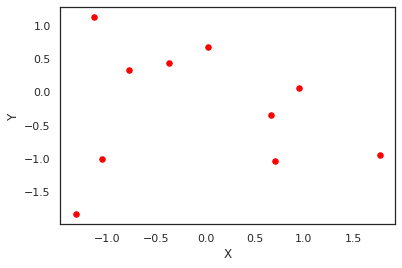

In [51]:
plt.scatter(X, y, s=30, c='r', linewidths=1)
plt.xlabel('X')
plt.ylabel('Y');

In [52]:
#Add x_0= 1
X=np.c_[np.ones(X.shape[0]),X[:,0]]


In [53]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [54]:
computeCost(X,y)

0.4257679962856263

In [55]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

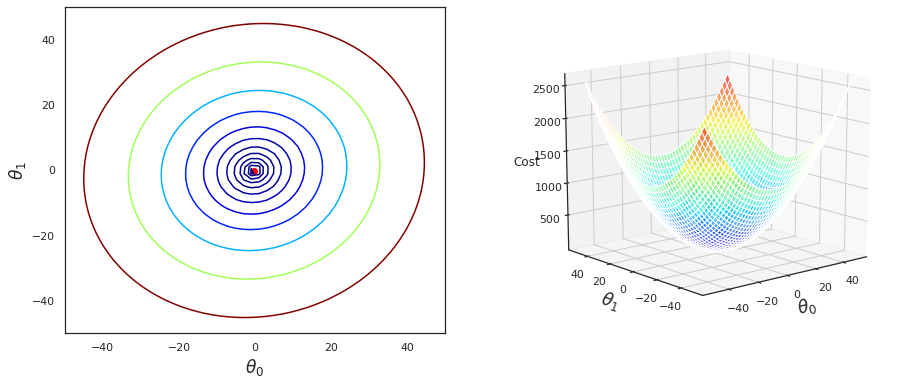

In [56]:
theta, J_history= gradientDescent(X,y)

# Create grid coordinates for plotting
B0 = np.linspace(-50, 50, 50)
B1 = np.linspace(-50, 50, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)